<a href="https://colab.research.google.com/github/PoornaManujaya/Machine-Learning-Begginer-/blob/main/Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
dir(digits) #used on an object to look at all the properties / attributes and methods of that object, without its values (if any)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()

<Figure size 640x480 with 0 Axes>

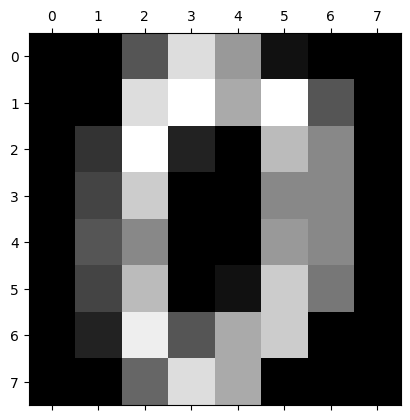

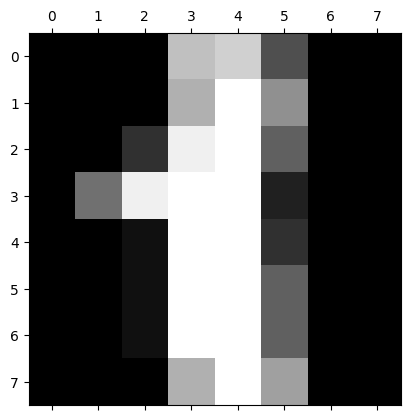

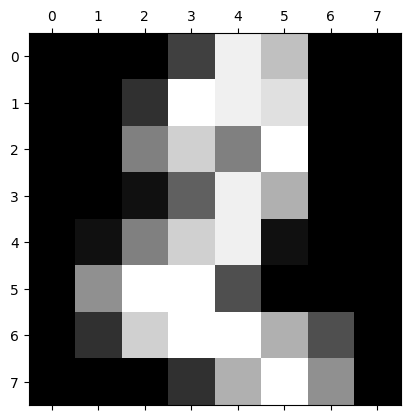

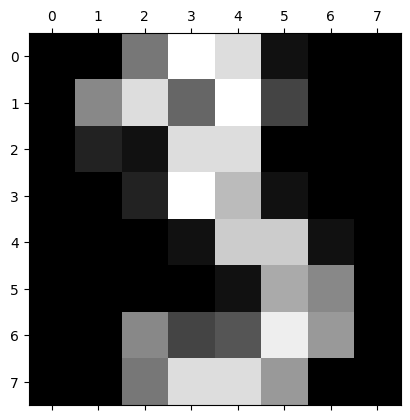

In [8]:
for i in range (4):
  plt.matshow(digits.images[i])

In [10]:
#numerical format of the data
df = pd.DataFrame(digits.data)
df.head()
#hence this images are 8x8, there should be total 64 columns

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
#in this dataset "target" in the dependent variable
df["target"] = digits.target
df["target"]

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
#define dependent and independent variables
X = df.drop('target', axis='columns')
y = df.target

In [19]:
from sklearn.ensemble import RandomForestClassifier
# ensemble - combined multiple machinelearn models to work as one synchronize unit
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
#in this model there are 20 tress working individually and colaberate for the final decision
model=RandomForestClassifier(n_estimators=20)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [24]:
model.score(X_test,y_test)

0.9638888888888889

In [25]:
y_predicted =model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_metrics = confusion_matrix(y_test,y_predicted)
confusion_metrics

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  1],
       [ 2,  1,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

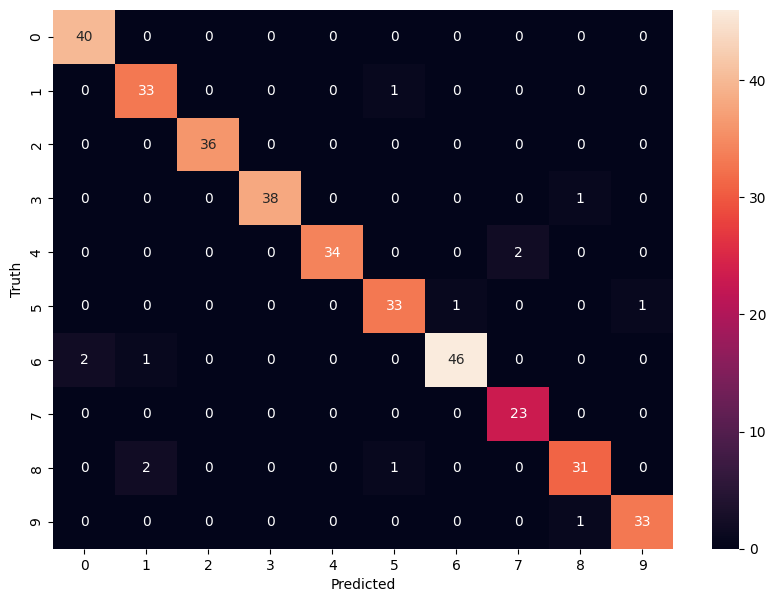

In [30]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_metrics,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
